<center><h1>Lab 4: Linear Regression</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>

<h4>In this lab experiment, we will be doing Linear Regression.</h4>
<p>The goal of simple linear regression is to model the relationship between
a single feature (explanatory variable x) and a continuous valued response (target
variable y).</p>
<p>We will be working on Housing Dataset in class. Then we have to implement on our dataset</p>

In [59]:
import pandas as pd
import numpy as np

In [60]:
housing=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',sep='\s+')
housing.columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']

In [61]:
print(housing)

         crim    zn  indus  chas    nox     rm    age     dis  rad    tax  \
0     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
1     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
2     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
3     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
4     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
5     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
6     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
7     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
8     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
9     0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
10    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
11    0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311.0   

<h4>We will visualize the pair-wise correlations between the different features in this dataset in one place.</h4>

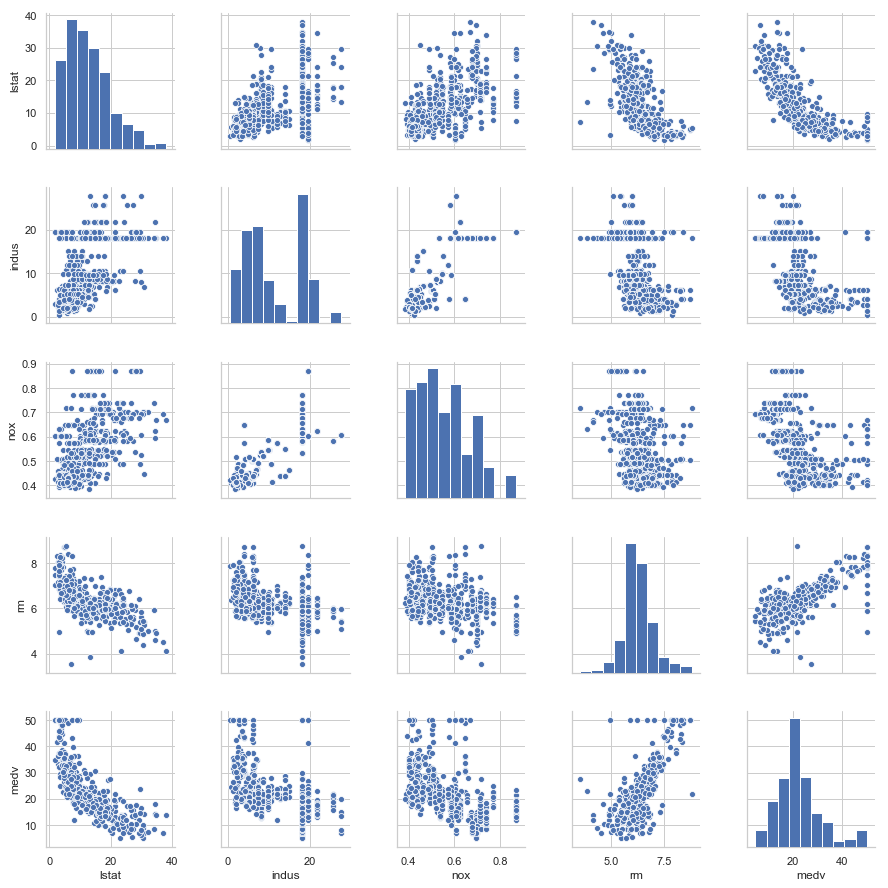

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid',context='notebook')
cols=['lstat', 'indus','nox','rm','medv']

sns.pairplot(housing[cols], height=2.5)
plt.tight_layout()
plt.show()

<h4>We will use NumPy's corrcoef function on the five
feature columns that we previously visualized in the scatterplot matrix, and we will
use seaborn's heatmap function to plot the correlation matrix array as a heat map</h4>

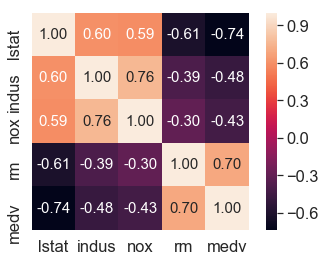

In [64]:
cm=np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

<h3>Simple Implementation using sklearn's LinearRegression</h3>

In [155]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
X=housing[['rm']].values
y=housing[['medv']].values

In [70]:
print(X.shape)
print(y.shape)

(505, 1)
(505, 1)


In [71]:
slr=LinearRegression()
slr.fit(X,y)
y_pred=slr.predict(X)
print('Slope: %.3f:' % slr.coef_[0] )
print('Intercept: %.3f'  % slr.intercept_)

Slope: 9.103:
Intercept: -34.677


In [72]:
def lin_regplot(X,y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return

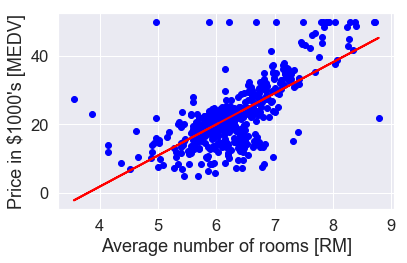

In [73]:
lin_regplot(X,y,slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

<p>As we can see in the plot, the linear regression line reflects the general
trend that house prices tend to increase with the number of rooms.</p>

<h4>Next we will be splitting the dataset into test and train samples and calculate residuals</h4>

In [11]:
from sklearn.model_selection import train_test_split

X=housing.iloc[:,:-1].values
y=housing['medv'].values

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [12]:
slr.fit(X_train,y_train)
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)

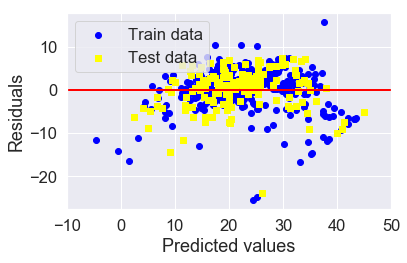

In [13]:
plt.scatter(y_train_pred, y_train_pred- y_train, c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred, y_test_pred- y_test, c='yellow', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
#plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

<h3>Implementation using RANSACRegressor</h3>
<p>Linear regression models can be heavily impacted by the presence of outliers.
In certain situations, a very small subset of our data can have a big effect on the
estimated model coefficients.</p>
<p>As an alternative to throwing out outliers, we will look at a robust method of
regression using the RANdom SAmple Consensus (RANSAC) algorithm,
which fits a regression model to a subset of the data, the so-called inliers.</p>

<h4>We can summarize the iterative RANSAC algorithm as follows:</h4>
<p>1. Select a random number of samples to be inliers and fit the model.</p>
<p>2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.</p>
<p>3. Refit the model using all inliers.</p>
<p>4. Estimate the error of the fitted model versus the inliers.</p>
<p>5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations has been reached; go back to step 1 otherwise.</p>

In [20]:
from sklearn.linear_model import RANSACRegressor
#ransac.fit(X, y)
ransac = RANSACRegressor(LinearRegression(),
    max_trials=100,
    min_samples=50,
    residual_metric=lambda x: np.sum(np.abs(x), axis=1),
    residual_threshold=5.0,
    random_state=0)

In [21]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x000001D8106989D8>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

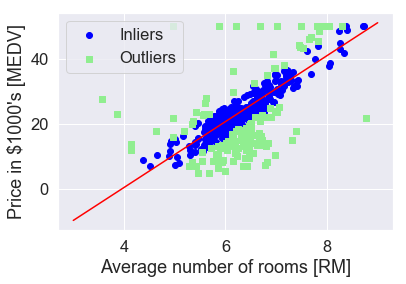

In [22]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

<center><h1> Implementation on my dataset</h1></center>

In [47]:
import pandas as pd
import numpy as np

In [48]:
housing_data=pd.read_csv("Preprocessed_datasets\\Housing-data.csv")

In [49]:
list(housing_data)

['Suburb',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

<h4>The scatterplot matrix provides us with a useful graphical summary of the relationships in a dataset</h4>

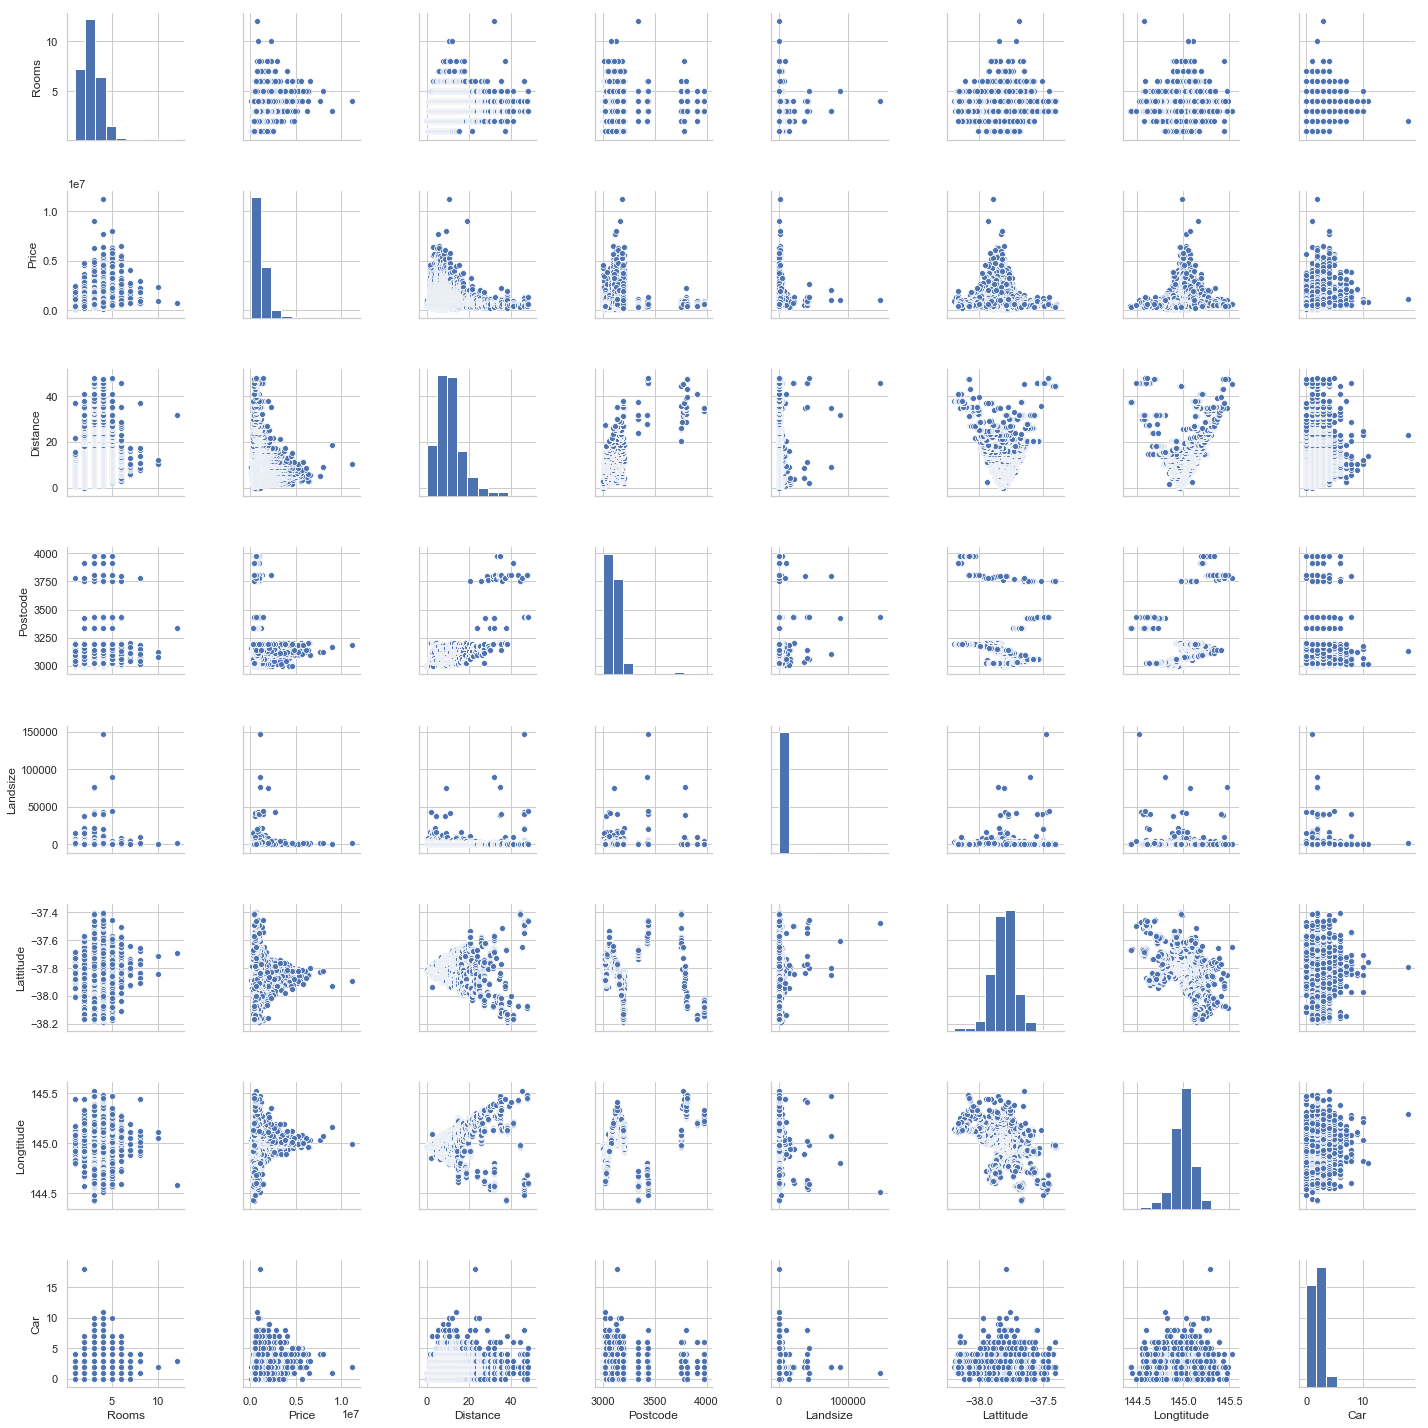

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid',context='notebook')
cols=['Rooms', 'Price','Distance','Postcode','Landsize','Lattitude','Longtitude','Car']

sns.pairplot(housing_data[cols], height=2.5)
plt.tight_layout()
plt.show()

<h4> Making a heat map of the correlations</h4>

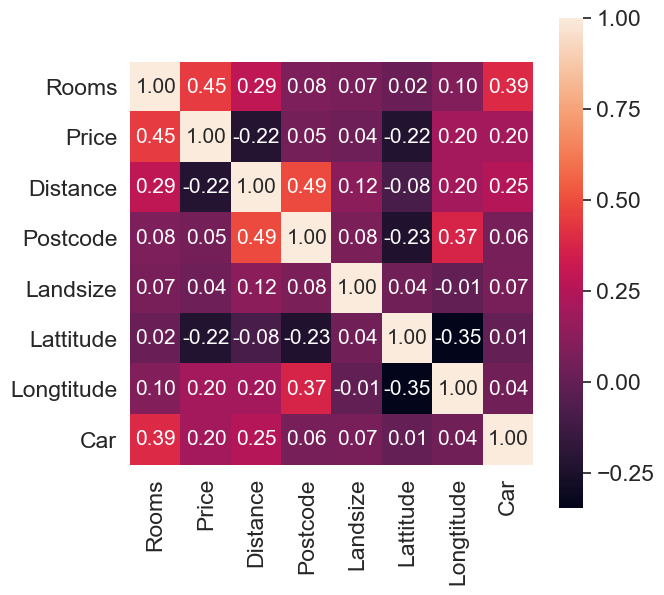

In [52]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6.5,6.5), dpi=100, facecolor='w', edgecolor='k')
cm=np.corrcoef(housing_data[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

In [150]:
X=housing_data['Distance'];
y=housing_data['Price'];

<h4>Fitting the Linear Regression model on X_train and y_train</h4>

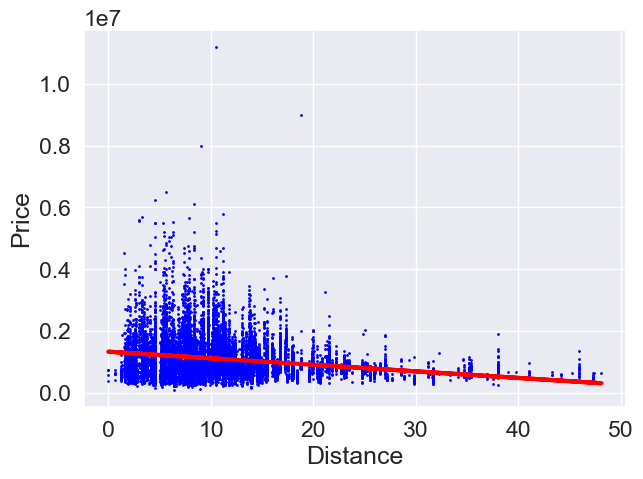

In [152]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
#print(X_train)
#print(np.shape(X_train))

lr=linear_model.LinearRegression()

# Train the model using the training sets
model = lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

# Plot outputs
figure(num=None, figsize=(7,5), dpi=100, facecolor='w', edgecolor='k')
plt.xlabel("Distance")
plt.ylabel("Price")
plt.scatter(X_train, y_train,  color='blue', s=1)
plt.plot(X_test,y_pred, color='red', linewidth=3)

<p>As we can see from the plot, in general, the price of houses decreases as its distance from the center of city increases.</p>

In [55]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

<h4>Making the plot of residuals.</h4>

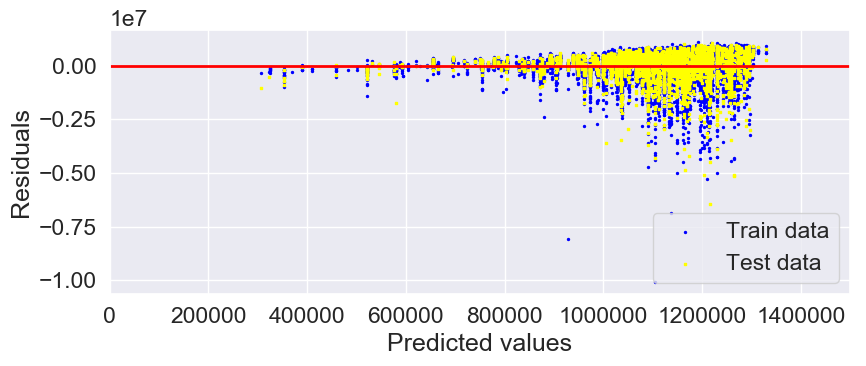

In [56]:
figure(num=None, figsize=(9,4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(y_train_pred, y_train_pred- y_train, c='blue', marker='o', label='Train data',s=2)
plt.scatter(y_test_pred, y_test_pred- y_test, c='yellow', marker='s', label='Test data',s=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='lower right')
plt.hlines(y=0, xmin=-10, xmax=1500000, linewidth=2, color='red')
plt.xlim([-10, 1500000])
plt.tight_layout()
#plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [156]:
X=housing_data['Distance'];
y=housing_data['Price'];

In [157]:
X=X[:]
print(X.shape)
X=np.expand_dims(X,axis=1)
print(X.shape)
y=y[:]
print(y.shape)
y=np.expand_dims(y,axis=1)
print(y.shape)

(17659,)
(17659, 1)
(17659,)
(17659, 1)


<h4>Fitting a RANSAC Regressor</h4>

In [159]:
from sklearn.linear_model import RANSACRegressor
#ransac.fit(X, y)
ransac = RANSACRegressor(LinearRegression(),
    max_trials=1000,
    min_samples=10000,
    residual_metric=lambda x: np.sum(np.abs(x), axis=1),
    residual_threshold=4*10**5,
    random_state=0)

In [160]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=1000, min_samples=10000, random_state=0,
        residual_metric=<function <lambda> at 0x000001825B2BD950>,
        residual_threshold=400000, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

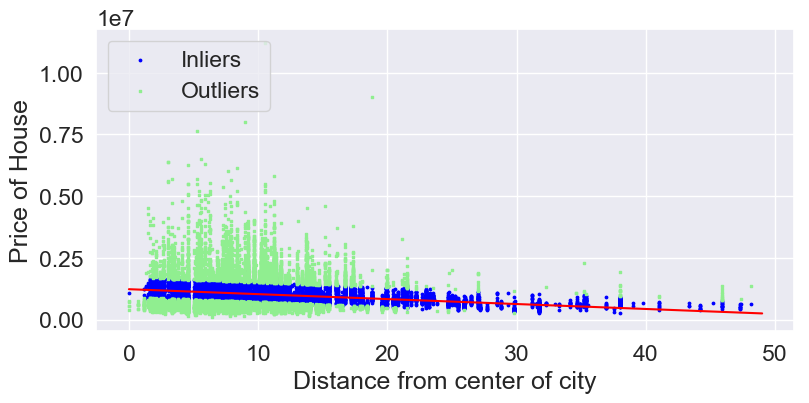

In [161]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 50, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
figure(num=None, figsize=(9,4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers',s=3)
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers',s=3)
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Distance from center of city')
plt.ylabel('Price of House')
plt.legend(loc='upper left')
plt.show()

<p><font size="3.5">As we can see in the following scatterplot, the linear regression model was fitted on
    the detected set of inliers shown as blue circles.</font></p>